# Monopoly Junior Party Analysis

In [29]:
import sys
import logging
import main
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
sns.set_style("whitegrid")
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
NUMBER_OF_ITERATIONS = 100000

In [3]:
winners, game_lengths, games = main.run_iterations(
    number_of_iterations=NUMBER_OF_ITERATIONS, number_of_players=2, seed=1234)
print(winners)

INFO:main:Playing game 1 of 100000
INFO:main:Playing game 1001 of 100000
INFO:main:Playing game 2001 of 100000
INFO:main:Playing game 3001 of 100000
INFO:main:Playing game 4001 of 100000
INFO:main:Playing game 5001 of 100000
INFO:main:Playing game 6001 of 100000
INFO:main:Playing game 7001 of 100000
INFO:main:Playing game 8001 of 100000
INFO:main:Playing game 9001 of 100000
INFO:main:Playing game 10001 of 100000
INFO:main:Playing game 11001 of 100000
INFO:main:Playing game 12001 of 100000
INFO:main:Playing game 13001 of 100000
INFO:main:Playing game 14001 of 100000
INFO:main:Playing game 15001 of 100000
INFO:main:Playing game 16001 of 100000
INFO:main:Playing game 17001 of 100000
INFO:main:Playing game 18001 of 100000
INFO:main:Playing game 19001 of 100000
INFO:main:Playing game 20001 of 100000
INFO:main:Playing game 21001 of 100000
INFO:main:Playing game 22001 of 100000
INFO:main:Playing game 23001 of 100000
INFO:main:Playing game 24001 of 100000
INFO:main:Playing game 25001 of 100000

In [4]:
# One of the shortest games
short_game = [game for game in games if game.turn_count == min(game_lengths)][0]
print('\n'.join(short_game.moves))
print(short_game.get_winners())

son rolled chance|{'type': 'goto-and-get', 'colour': 'red'} bought Clown Party
dad rolled 4|dad --> Swimming Party bought!
son rolled 6|son --> Spooky Party bought!
dad rolled 5|dad --> Party Box
son rolled 1|son --> Safari Party bought!
dad rolled 1|dad --> Pizza Party bought!
son rolled 2|son --> Beach Party bought!
dad rolled 1|dad --> Piñata Party bought!
son rolled 1|son --> Theme Park Party bought!
['dad']


In [ ]:
# Distribution of game lengths
game_lengths_sorted = sorted(list(game_lengths.items()), key=lambda x: x[0])
game_x, game_y = zip(*game_lengths_sorted)
game_y = [y / sum(game_y) * 100 for y in game_y]

def make_area_graph(x, y, filename):
    # Color palette
    blue, = sns.color_palette("muted", 1)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, y, color=blue, lw=3)
    ax.fill_between(x, 0, y, alpha=.3)
    ax.set(xlim=(0, len(x) - 1), ylim=(0, None))
    plt.title('Game length distribution')
    plt.ylabel('Percentage of games')
    plt.xlabel('Moves')
    fig.savefig(filename, bbox_inches='tight', dpi=100)

make_area_graph(game_x, game_y, filename='game_length_2_player.png')

In [7]:
# Best and worst starting moves for me
son_wins = defaultdict(int)
all_starting_moves = defaultdict(int)
for game in games:
    game.starting_moves = (game.moves[0].split('|')[0], game.moves[1].split('|')[0])
    all_starting_moves[game.starting_moves] += 1
    if 'son' in game.get_winners():
        son_wins[game.starting_moves] += 1

starting_moves = [(k, son_wins[k] / v * 100) for k, v in all_starting_moves.items()]
for k, v in sorted(starting_moves, key=lambda x: x[1]):
    print('When {}, son won {:.2f}%'.format(k, v))

When ('son rolled 1', 'dad rolled 5'), son won 46.27%
When ('son rolled 1', 'dad rolled 2'), son won 47.95%
When ('son rolled 1', 'dad rolled 4'), son won 49.37%
When ('son rolled 1', 'dad rolled chance'), son won 49.39%
When ('son rolled 2', 'dad rolled 4'), son won 49.47%
When ('son rolled 4', 'dad rolled chance'), son won 49.52%
When ('son rolled 4', 'dad rolled 5'), son won 49.53%
When ('son rolled 1', 'dad rolled 6'), son won 49.63%
When ('son rolled chance', 'dad rolled chance'), son won 49.71%
When ('son rolled 2', 'dad rolled chance'), son won 49.87%
When ('son rolled 2', 'dad rolled 5'), son won 50.15%
When ('son rolled 6', 'dad rolled chance'), son won 50.29%
When ('son rolled 5', 'dad rolled chance'), son won 51.31%
When ('son rolled 5', 'dad rolled 6'), son won 51.52%
When ('son rolled 4', 'dad rolled 6'), son won 51.87%
When ('son rolled 2', 'dad rolled 6'), son won 51.93%
When ('son rolled 6', 'dad rolled 2'), son won 52.23%
When ('son rolled chance', 'dad rolled 5'), son

In [5]:
#Three players
winners_3, game_lengths_3, games_3 = main.run_iterations(
    number_of_iterations=NUMBER_OF_ITERATIONS, number_of_players=3, seed=1234)
print(winners)

INFO:main:Playing game 1 of 100000
INFO:main:Playing game 1001 of 100000
INFO:main:Playing game 2001 of 100000
INFO:main:Playing game 3001 of 100000
INFO:main:Playing game 4001 of 100000
INFO:main:Playing game 5001 of 100000
INFO:main:Playing game 6001 of 100000
INFO:main:Playing game 7001 of 100000
INFO:main:Playing game 8001 of 100000
INFO:main:Playing game 9001 of 100000
INFO:main:Playing game 10001 of 100000
INFO:main:Playing game 11001 of 100000
INFO:main:Playing game 12001 of 100000
INFO:main:Playing game 13001 of 100000
INFO:main:Playing game 14001 of 100000
INFO:main:Playing game 15001 of 100000
INFO:main:Playing game 16001 of 100000
INFO:main:Playing game 17001 of 100000
INFO:main:Playing game 18001 of 100000
INFO:main:Playing game 19001 of 100000
INFO:main:Playing game 20001 of 100000
INFO:main:Playing game 21001 of 100000
INFO:main:Playing game 22001 of 100000
INFO:main:Playing game 23001 of 100000
INFO:main:Playing game 24001 of 100000
INFO:main:Playing game 25001 of 100000

In [6]:
#four players
winners_4, game_lengths_4, games_4 = main.run_iterations(
    number_of_iterations=NUMBER_OF_ITERATIONS, number_of_players=4, seed=1234)
print(winners)

INFO:main:Playing game 1 of 100000
INFO:main:Playing game 1001 of 100000
INFO:main:Playing game 2001 of 100000
INFO:main:Playing game 3001 of 100000
INFO:main:Playing game 4001 of 100000
INFO:main:Playing game 5001 of 100000
INFO:main:Playing game 6001 of 100000
INFO:main:Playing game 7001 of 100000
INFO:main:Playing game 8001 of 100000
INFO:main:Playing game 9001 of 100000
INFO:main:Playing game 10001 of 100000
INFO:main:Playing game 11001 of 100000
INFO:main:Playing game 12001 of 100000
INFO:main:Playing game 13001 of 100000
INFO:main:Playing game 14001 of 100000
INFO:main:Playing game 15001 of 100000
INFO:main:Playing game 16001 of 100000
INFO:main:Playing game 17001 of 100000
INFO:main:Playing game 18001 of 100000
INFO:main:Playing game 19001 of 100000
INFO:main:Playing game 20001 of 100000
INFO:main:Playing game 21001 of 100000
INFO:main:Playing game 22001 of 100000
INFO:main:Playing game 23001 of 100000
INFO:main:Playing game 24001 of 100000
INFO:main:Playing game 25001 of 100000

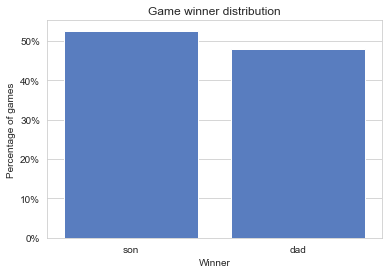

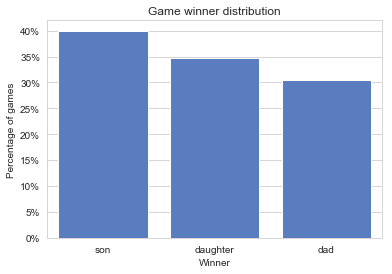

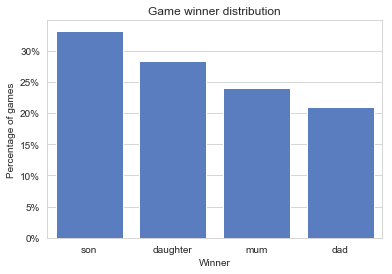

In [26]:
def make_bar_graph(x, y, filename):
    # Color palette
    blue, = sns.color_palette("muted", 1)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=x, y=y, color=blue,ax=ax, ci=None)
    #ax.set_yli
    plt.title('Game winner distribution')
    plt.ylabel('Percentage of games')
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(val) for val in vals])
    plt.xlabel('Winner')
    ax.set_xticks(range(len(x)))
    labels = ['son', 'dad']
    if len(x) == 3:
        labels = ['son', 'daughter', 'dad']
    elif len(x) == 4:
        labels = ['son', 'daughter', 'mum', 'dad']
    ax.set_xticklabels(labels)#, rotation=45)
    fig.savefig(filename, bbox_inches='tight', dpi=100)

x = ['son', 'dad']
y = [winners[str(person)] / NUMBER_OF_ITERATIONS for person in x]
make_bar_graph(x, y, filename='game_winners_2.png')

x = list(range(1, len(winners_3) + 1))
y = [winners_3[str(person)] / NUMBER_OF_ITERATIONS for person in x]
make_bar_graph(x, y, filename='game_winners_3.png')

x = list(range(1, len(winners_4) + 1))
y = [winners_4[str(person)] / NUMBER_OF_ITERATIONS for person in x]
make_bar_graph(x, y, filename='game_winners_4.png')

In [39]:
all_winning_squares = []
all_losing_squares = []
for game in games:
    all_winning_squares.append(
        set().union(*[p.squares_owned for p in game.players if p.name in game.get_winners()]))
    all_losing_squares.append(
        set().union(*[p.squares_owned for p in game.players if p.name not in game.get_winners()]))
winning_squares = Counter([item for sublist in all_winning_squares for item in sublist])
losing_squares = Counter([item for sublist in all_losing_squares for item in sublist])

In [51]:
for k, v in winning_squares.most_common():
    print(k, v / (v + losing_squares[k]))

Pizza Party 0.5436784785061362
Clown Party 0.5500593915017229
Pirate Party 0.5516182235395354
Bowling Party 0.5307363865005557
Piñata Party 0.5322561340514662
Swimming Party 0.5297685535497664
Dance Party 0.5366743824325483
Spooky Party 0.5807229240175613
Beach Party 0.6086196019957562
Ice-Skating Party 0.5258300058464256
Magic Party 0.5330536743151724
Movie Party 0.5374784990762566
Bouncy Castle Party 0.5238736884131202
Princess Party 0.5321929074281203
Safari Party 0.562125373546838
Theme Park Party 0.5990966435635854


In [45]:
losing_squares.most_common()

[('Bowling Party', 40115),
 ('Pizza Party', 39637),
 ('Swimming Party', 39151),
 ('Piñata Party', 39080),
 ('Clown Party', 38258),
 ('Bouncy Castle Party', 38162),
 ('Ice-Skating Party', 38119),
 ('Dance Party', 37831),
 ('Pirate Party', 37517),
 ('Magic Party', 36956),
 ('Movie Party', 36301),
 ('Princess Party', 35551),
 ('Spooky Party', 31133),
 ('Beach Party', 27298),
 ('Safari Party', 25349),
 ('Theme Park Party', 20592)]